# Part I - Prosper Loan Data Exploration


# by Jean Felix Ndayambaje

## Preliminary Wrangling


Data set contains information on peer to peer loans facilitated by credit company Prosper

In [2]:
#importing all required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("prosperLoanData.csv")
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
108858,EA523596411674633BE2B22,1033531,2013-12-07 11:23:48.543000000,NaN,36,Past Due (16-30 days),NaN,0.21648,0.1795,0.1695,...,-2.55,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
23901,05613526384663052DA5F12,528034,2011-09-18 20:57:30.093000000,NaN,36,Completed,2012-05-10 00:00:00,0.16056,0.1390,0.1290,...,-68.23,0.0,0.00,0.00,0.0,1.0,0,0,0.0,100
1497,30B433682852996309ABF6B,39752,2006-09-15 12:03:54.050000000,A,36,Defaulted,2007-06-29 00:00:00,0.17722,0.1700,0.1650,...,-8.86,0.0,4610.14,4598.58,0.0,1.0,0,0,0.0,40
47541,443E353634908636816F662,552558,2012-01-18 21:37:38.290000000,NaN,36,Completed,2012-04-20 00:00:00,0.06828,0.0649,0.0549,...,-4.07,0.0,0.00,0.00,0.0,1.0,0,0,0.0,52
72235,E0AD3365954791833019B1C,3893,2006-03-27 22:58:13.333000000,B,36,Completed,2006-07-28 00:00:00,0.12901,0.1220,0.1170,...,-7.54,0.0,0.00,0.00,0.0,1.0,0,0,0.0,52
35145,03373545338785935A6F75F,582043,2012-04-24 12:44:53.273000000,NaN,36,Current,NaN,0.22742,0.1902,0.1802,...,-136.36,0.0,0.00,0.00,0.0,1.0,0,0,0.0,13
39356,9B8335324769332981071EB,540370,2011-11-21 13:57:34.823000000,NaN,36,Current,NaN,0.29240,0.2537,0.2437,...,-95.44,0.0,0.00,0.00,0.0,1.0,0,0,0.0,42
180,0F4C35965009736891E5D16,1068929,2013-12-13 03:54:33.400000000,NaN,36,Current,NaN,0.23438,0.1970,0.1870,...,-12.21,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
28775,C36B35363753191160E93BB,552269,2012-01-18 07:08:04.253000000,NaN,36,Current,NaN,0.17359,0.1449,0.1349,...,-220.71,0.0,0.00,0.00,0.0,1.0,0,0,0.0,169
76614,19CB34849098750708E42A2,460798,2010-06-01 17:24:37.647000000,NaN,36,Completed,2013-06-11 00:00:00,0.13119,0.1100,0.1000,...,-148.00,0.0,0.00,0.00,0.0,1.0,0,0,0.0,236


This dataset has 81 columns. For this analysis, I have taken the following columns (variables):

In [5]:
target_columns =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

In [6]:
target_df = df[target_columns]

In [7]:
target_df.sample(10)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
10600,36,Current,0.2310,D,1,Employed,0.0,2333.333333,NaN,4000,2013-10-22 00:00:00,0,2
13053,36,Completed,0.0810,NaN,3,Full-time,0.0,7500.000000,NaN,2000,2008-07-18 00:00:00,0,84
105607,36,Chargedoff,0.3177,HR,2,Employed,0.0,1291.666667,NaN,2000,2012-01-19 00:00:00,0,1
109298,36,Completed,0.1902,C,2,Full-time,0.0,12958.333333,2.0,7000,2012-07-02 00:00:00,0,18
71588,60,Current,0.1840,C,1,Employed,0.0,11666.666667,NaN,15000,2013-09-26 00:00:00,0,1
87737,36,Current,0.0974,A,2,Employed,0.0,15833.333333,NaN,8000,2012-10-26 00:00:00,0,104
19293,36,Current,0.1599,B,1,Employed,0.0,4583.333333,1.0,4622,2012-09-05 00:00:00,0,90
28939,36,Defaulted,0.3234,NaN,1,Full-time,0.0,0.000000,NaN,2000,2008-05-05 00:00:00,0,7
45519,36,Chargedoff,0.2600,NaN,0,Not available,4.0,4333.333333,NaN,2550,2006-08-01 00:00:00,0,21
47237,36,Completed,0.1926,NaN,4,Full-time,9.0,3033.333333,1.0,5000,2007-12-31 00:00:00,1,44


As Prosper has only been using its own Prosper Rating from 2009, we have many missing values in the Prosper Rating column. Let's remove the missing values:

In [8]:
target_df = target_df.dropna(subset=['ProsperRating (Alpha)']).reset_index()


Converting Loan Origination Date to datetime datatype:



In [9]:
target_df['LoanOriginationDate'] = pd.to_datetime(target_df['LoanOriginationDate'])


In [10]:
target_df['TotalProsperLoans'] = target_df['TotalProsperLoans'].fillna(0)


In [11]:
target_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      84853 non-null  int64         
 1   Term                       84853 non-null  int64         
 2   LoanStatus                 84853 non-null  object        
 3   BorrowerRate               84853 non-null  float64       
 4   ProsperRating (Alpha)      84853 non-null  object        
 5   ListingCategory (numeric)  84853 non-null  int64         
 6   EmploymentStatus           84853 non-null  object        
 7   DelinquenciesLast7Years    84853 non-null  float64       
 8   StatedMonthlyIncome        84853 non-null  float64       
 9   TotalProsperLoans          84853 non-null  float64       
 10  LoanOriginalAmount         84853 non-null  int64         
 11  LoanOriginationDate        84853 non-null  datetime64[ns]
 12  Reco

### What are the main characteristics of interest in your dataset?

I am trying to understand which characteristics can be used to predict default. I would also like to check what are the main factors related to prosper credit rating.

### What characteristics of the dataset do you think will help you to investigate the characteristic(s) you are interested in?

I would expect the borrower's Prosper rating to have the greatest impact on the chances of default. I also expect the loan amount to play a major role and perhaps the credit category. The Prosper rating will depend on declared income and employment status.

### Univariate Exploration


#### Loan status


Text(0.5, 1.015, 'Loan Status Vs count')

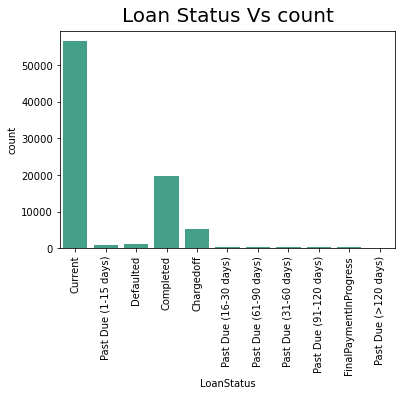

In [13]:
# setting color
base_color = sns.color_palette("husl", 9)[4]
plt.xticks(rotation=90)
sns.countplot(data = target_df, x = 'LoanStatus', color = base_color);
plt.title('Loan Status Vs count', fontsize=20, y=1.015)
# pl.suptitle("Setting color")



First Observation:

1. Most of the loans in the data set are actually current loans.
2. Past due loans are split in several groups based on the length of payment delay.
3. Other big part is completed loans, defaulted loans compromise a minority, however chargedoff loans also comporomise a substanial amount.

### Employment Status


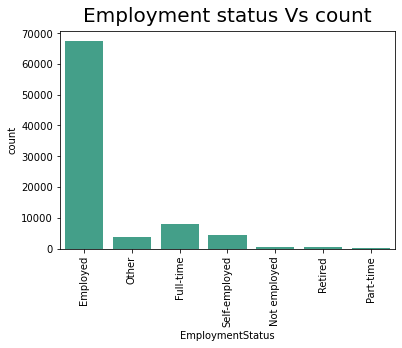

In [14]:
sns.countplot(data = target_df, x = 'EmploymentStatus', color = base_color);
plt.xticks(rotation = 90);
plt.title('Employment stat Vs count', fontsize=20, y=1.015)
title='Employment Status'

Second Observation:

1. The majority of borrowers are employed and all other categories as small part of borrowers.
2. In small Group full time has highest, after that self empolyed are there and so on.

### Stated Monthly Income


Text(0.5, 1.015, 'Stated Monthly Income')

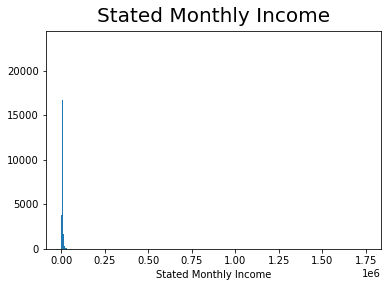

In [15]:
plt.hist(data=target_df, x='StatedMonthlyIncome', bins=1000);
plt.xlabel("Stated Monthly Income")
plt.title('Stated Monthly Income', fontsize=20, y=1.015)


# title='Monthly Income'

N.B: Distribution of stated monthly income is highly skewed to the right. so, we have to check how many outliers are there

In [17]:
income_std = target_df['StatedMonthlyIncome'].std()
income_mean = target_df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(target_df[target_df['StatedMonthlyIncome'] >= boundary])

245

#### After magnifying the chart, the result is as follows

Text(0.5, 0, 'Stated Monthly Income')

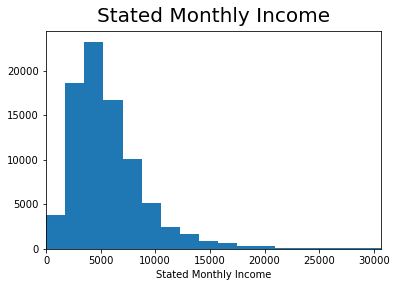

In [18]:
plt.hist(data=target_df, x='StatedMonthlyIncome', bins=1000);
plt.xlim(0, boundary);
plt.title('Stated Monthly Income', fontsize=20, y=1.015)
plt.xlabel("Stated Monthly Income")

# title='Stated Monthly Income'

Third Observation

With a boundary of mean and 3 times standard deviations distribution of monthly income still has noticeable right skew but now we can see that mode is about 5000.

#### Discussing the distribution(s) of variable(s) of interest. Were there any unusual points? Need to perform any transformations?

The distribution of declared monthly income is very uneven: with many outliers and a very wide range, but it remains well oriented. The majority of borrowers are employed and all other categories represent only a small proportion of borrowers. Most of the loans in the data set are in fact outstanding loans.

#### in the features  investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The majority of loans are actually current loans. Since our main goal is to define driving factors of outcome of loan we are not interested in any current loans.

### Bivariate Exploration


In [19]:
#Adjusting the form of data

condition = (target_df['LoanStatus'] == 'Completed') | (target_df['LoanStatus'] == 'Defaulted') |\
                  (target_df['LoanStatus'] == 'Chargedoff')
target_df = target_df[condition]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
target_df['LoanStatus'] = target_df.apply(change_to_defaulted, axis=1)
target_df['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

#### After transforming dataset we have 19664 completed loans and 6341 defaulted.

In [20]:
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categorie(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
target_df['ListingCategory (numeric)'] = target_df.apply(reduce_categorie, axis=1)
target_df['ListingCategory (numeric)'].value_counts()

Debt Consolidation    12740
Other                  7083
Home Improvement       2612
Business               2366
Auto                   1204
Name: ListingCategory (numeric), dtype: int64

Variable Listing Category is set up as numeric and most of the values have very low frequency, for the easier visualization so we have to change it to categorical and reduce the number of categories.

#### Status and Prosper Rating:

Text(0.5, 1.015, 'Status and Prosper Rating')

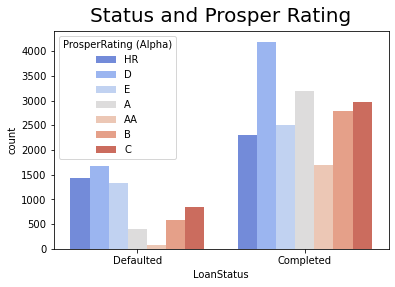

In [22]:
sns.countplot(data = target_df, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'coolwarm')
plt.title('Status and Prosper Rating', fontsize=20, y=1.015)



First Observation:

1. The most frequent rating among defaulted loans is actually D.
2. And the most frequent rating among Completed is alsoDand second highest is A and so on.

#### Credit Start with Listing Category:

Text(0.5, 1.015, 'Credit Start with Listing Category')

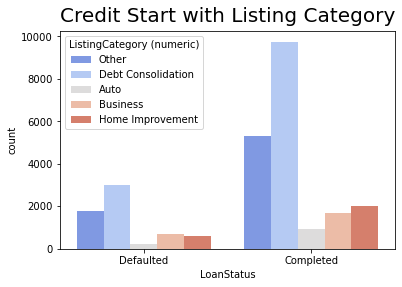

In [23]:
sns.countplot(data = target_df, x = 'LoanStatus', hue = 'ListingCategory (numeric)', palette = 'coolwarm');
plt.title('Credit Start with Listing Category', fontsize=20, y=1.015)


Second Observation

In both of the Graphs the debt Consolidation have most frequency among all of them

### Loan Status and Loan Amount


Text(0.5, 1.015, 'Loan Status and Loan Amount')

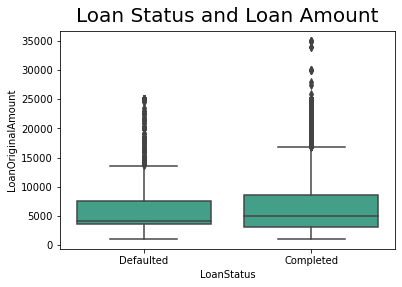

In [24]:
sns.boxplot(data = target_df, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color);
plt.title('Loan Status and Loan Amount', fontsize=20, y=1.015)

Third Observation

As from Above Graph we can state that defaulted credits tend to be smaller than completed credits onces.


### Prosper Rating and Employment Status


Text(0.5, 1.015, 'Prosper Rating and Employment Status')

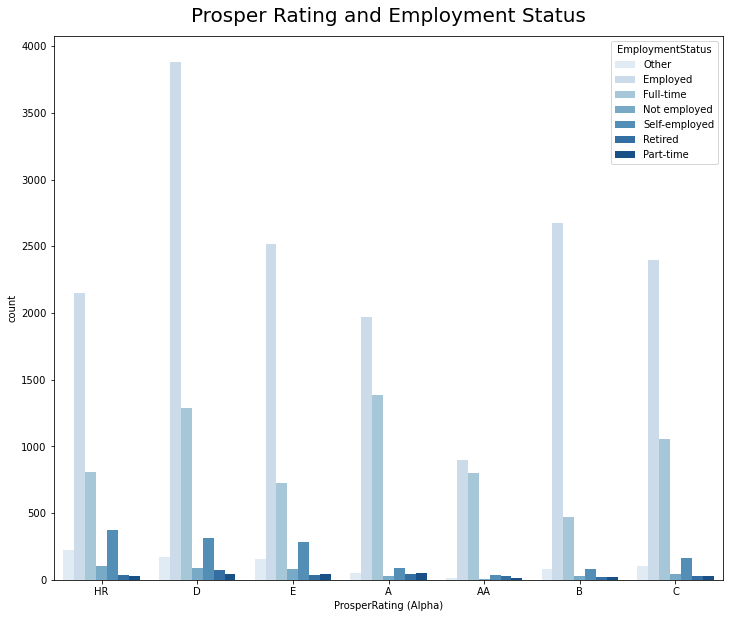

In [25]:
plt.figure(figsize = [12, 10])
sns.countplot(data = target_df, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'Blues');
plt.title('Prosper Rating and Employment Status', fontsize=20, y=1.015)

Observation

In both of the Graphs the debt Consolidation have most frequency among all of them.


### Loan Status and Loan Amount


Text(0.5, 1.015, 'Loan Status and Loan Amount')

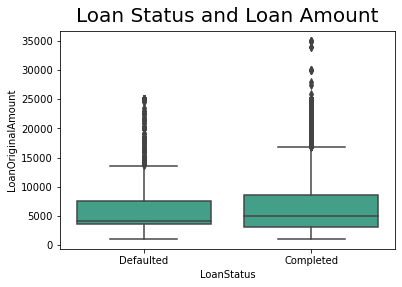

In [26]:
sns.boxplot(data = target_df, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color);
plt.title('Loan Status and Loan Amount', fontsize=20, y=1.015)


Observation

From Above Graph we can state that defaulted credits tend to be smaller than completed credits onces.


### Prosper Rating and Employment Status


Text(0.5, 1.015, 'Prosper Rating and Employment Status')

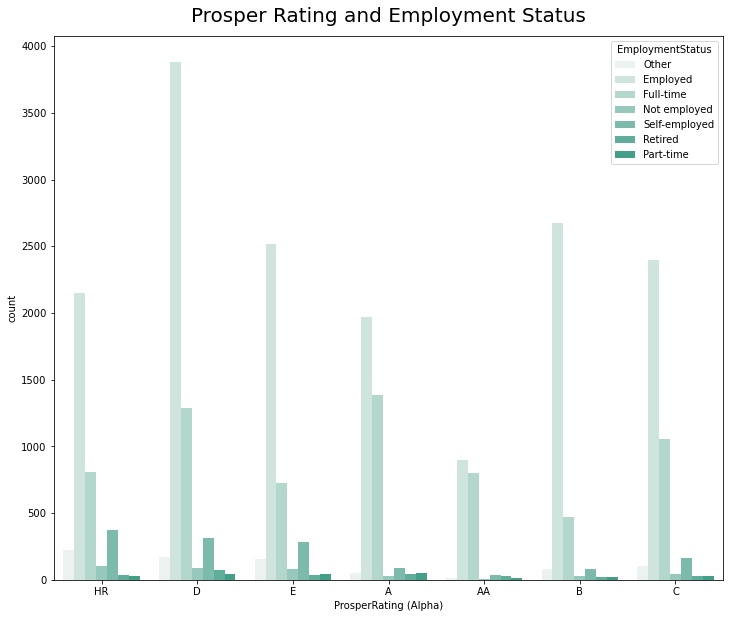

In [27]:
plt.figure(figsize = [12, 10])
sns.countplot(data = target_df, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus',color = base_color);
plt.title('Prosper Rating and Employment Status', fontsize=20, y=1.015)

Observation

Lower ratings seem to have greater proportions of individuals with employment status Not Employed, Self-employed, Retired and Part-Time.

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In Loan status vs Loan amount defaulted credits tend to be smaller than completed credits onces. Employment status of individuals with lower ratings tends to be 'Not employed', 'Self-employed', 'Retired' or 'Part-time'.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Prosper rating D is the most frequent rating among defaulted credits.

### Multivariate Exploration


### Rating, Loan Amount and Loan Status


Text(0.5, 1.015, 'Rating, Loan Amount and Loan Status')

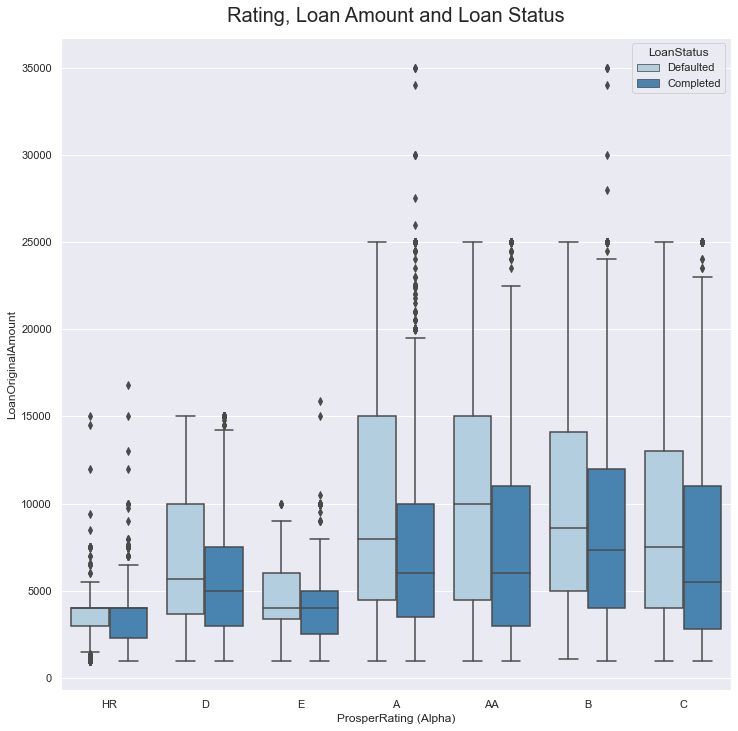

In [41]:
plt.figure(figsize = [12, 12])
#reference: https://seaborn.pydata.org/generated/seaborn.boxplot.html###
sns.set(style="darkgrid")
sns.boxplot(data=target_df, x="ProsperRating (Alpha)", y="LoanOriginalAmount", hue="LoanStatus", palette="Blues")
plt.title('Rating, Loan Amount and Loan Status', fontsize=20, y=1.015)


Observation

1. Except for the lowest ratings defaulted credits tend to be larger than completed.
2. Most of the defaulted credits comes from individuals with low Prosper rating.

#### Relationships between Credit category, Credit rating and outcome of Credit.

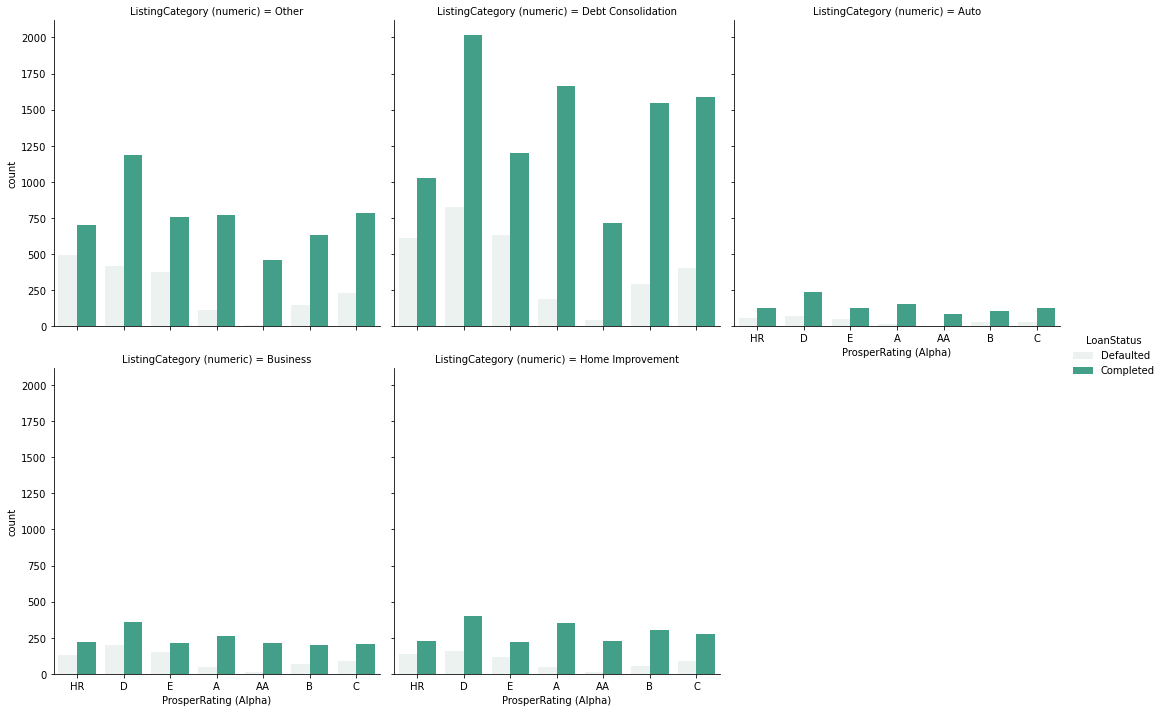

In [34]:
sns.catplot(x = 'ProsperRating (Alpha)', hue = 'LoanStatus', col = 'ListingCategory (numeric)',
              data = target_df, kind = 'count', color = base_color, col_wrap = 3);

Observation

1. There are 5 graphs in the second one has much up and downs in it other than all of them.
2. There is no substantial difference for default rates in different categories broken up by ratings.

#### Amount, Listing Category Loan and Loan Status Interact

Text(0.5, 1.015, 'Amount, Listing Category Loan and Loan Status Interact')

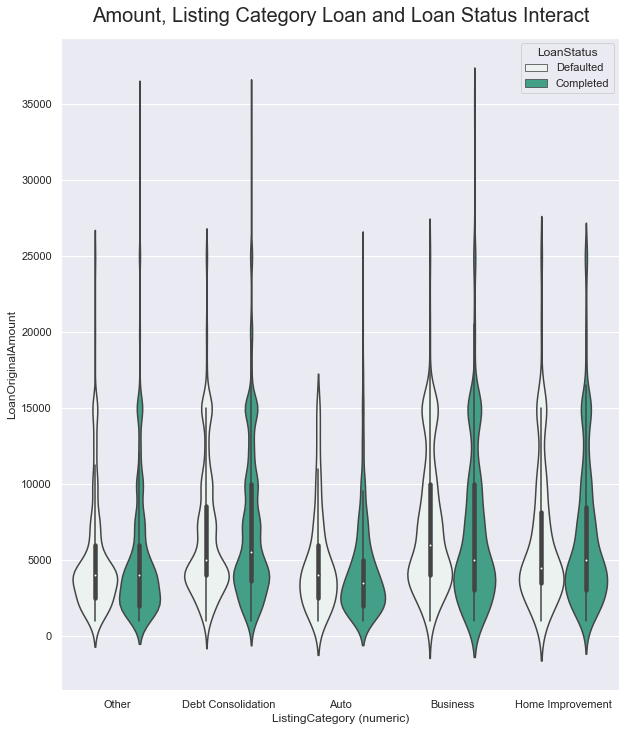

In [50]:
plt.figure(figsize = [10, 12])
sns.set(style="darkgrid")
sns.violinplot(data=target_df, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus',color = base_color);
plt.title('Amount, Listing Category Loan and Loan Status Interact', fontsize=20, y=1.015)

Observation

1. Except for Auto, Business and Home Improvemrnt dont have nearly equal mean amoong all of them.
2. Business category tend to have larger amount.

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Our initial assumptions were strengthened. Most of the defaulted credits comes from individuals with low Prosper rating and Business category tend to have larger amount.

#### Were there any interesting or surprising interactions between features?

Interesting find was that defaulted credits for individuals with high Prosper ratings tend to be larger than completed credits.